# 인공신경망 손글씨 인식 Lab

In [1]:
# 필요한 패키지 가져오기
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [8]:
# 데이터 가져오기

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
# 하이퍼 파라미터 설정
batch_size = 128
num_classes = 10
epochs = 10

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
# 데이터 전처리
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [12]:
# 목표 변수 전처리 - one-hot 인코딩

y_train = tf.keras.utils.to_categorical(y_train, num_classes) 
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [13]:
y_train.shape

(50000, 10)

In [15]:
# 모형 구조 정의하기

model = Sequential()
model.add(Input(shape=(3072,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               1573376   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1841162 (7.02 MB)
Trainable params: 1841162 (7.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [16]:
# 학습 정의하기

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [17]:
# 학습하기

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 2s 7ms/step - loss: 2.0043 - accuracy: 0.2703 - val_loss: 1.8138 - val_accuracy: 0.3468
Epoch 2/10
274/274 [==============================] - 2s 7ms/step - loss: 1.8436 - accuracy: 0.3310 - val_loss: 1.7635 - val_accuracy: 0.3621
Epoch 3/10
274/274 [==============================] - 2s 6ms/step - loss: 1.7885 - accuracy: 0.3525 - val_loss: 1.7038 - val_accuracy: 0.3911
Epoch 4/10
274/274 [==============================] - 2s 8ms/step - loss: 1.7426 - accuracy: 0.3677 - val_loss: 1.7076 - val_accuracy: 0.3878
Epoch 5/10
274/274 [==============================] - 2s 6ms/step - loss: 1.7191 - accuracy: 0.3759 - val_loss: 1.6643 - val_accuracy: 0.4073
Epoch 6/10
274/274 [==============================] - 2s 6ms/step - loss: 1.6878 - accuracy: 0.3916 - val_loss: 1.6619 - val_accuracy: 0.4007
Epoch 7/10
274/274 [==============================] - 2s 7ms/step - loss: 1.6611 - accuracy: 0.3992 - val_loss: 1.6382 - val_accuracy: 0.4153
Epoch 

In [18]:
# 성능 평가하기

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.554147720336914
Test accuracy: 0.4465999901294708


In [19]:
#성능 그래프로 그리기

# graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

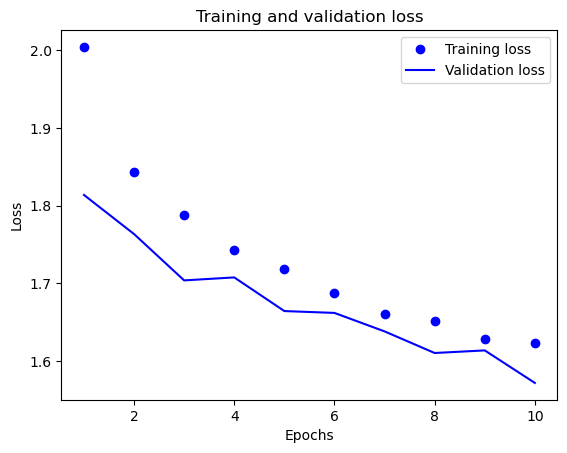

<Figure size 640x480 with 0 Axes>

In [20]:
epoch_range = range(1, len(acc) + 1)
epoch_range
plt.plot(epoch_range, loss, 'bo', label='Training loss')
plt.plot(epoch_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

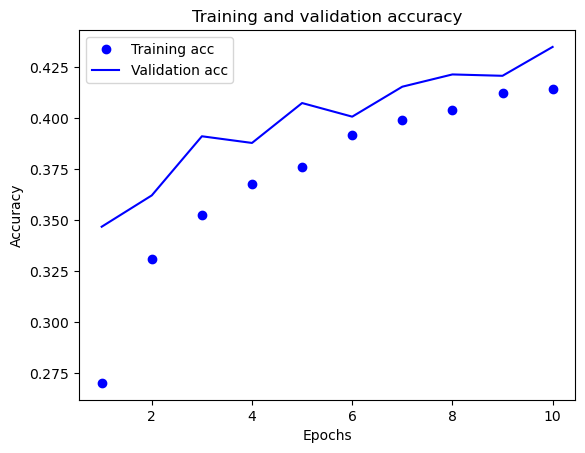

<Figure size 640x480 with 0 Axes>

In [21]:
plt.plot(epoch_range, acc, 'bo', label='Training acc')
plt.plot(epoch_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()